### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [95]:
#PART A: Data Wrangling
import pandas as pd
import numpy as np

df = pd.read_csv('student_academic.csv')
af = pd.read_csv('student_activities.csv')

#print(df.head())
#print(af.head())

#df.info()
#af.info()

grade_cleaned = df.dropna()
print(grade_cleaned.head())
act_cleaned = af.dropna()
print(act_cleaned.head())

grade_cleaned = grade_cleaned.copy()

grade_cleaned.loc[:, 'GPA_change'] = grade_cleaned['GPA_Sem2'] - grade_cleaned['GPA_Sem1']
grade_cleaned.loc[:, 'StudyIntensity'] = grade_cleaned['Hours_Study'] / grade_cleaned['Credits_Enrolled']
grade_cleaned.loc[:, 'AttendanceFlag'] = np.where(grade_cleaned['AttendanceRate'] >= 0.90, 'Good Attendance', 'Low Attendance')
print(grade_cleaned.head())






   StudentID       Major  ClassYear  GPA_Sem1  GPA_Sem2  Credits_Enrolled  \
0       1001  Psychology   Freshman      3.86      3.68                14   
1       1002     English     Senior      3.01      3.29                13   
2       1003   Economics     Senior      3.23      3.23                15   
3       1004     English  Sophomore      2.96      2.85                16   
4       1005     English     Senior      2.93      2.92                12   

   Hours_Study  AttendanceRate Scholarship  
0         12.0            0.98          No  
1         24.0            0.76          No  
2         33.0            0.89          No  
3         14.0            0.93         Yes  
4         38.0            0.97         Yes  
   StudentID            Activity  HoursPerWeek LeadershipRole
0       1003   Intramural Sports            11             No
1       1003         Debate Team             1             No
2       1004         Debate Team             5             No
3       1007  Stude

---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

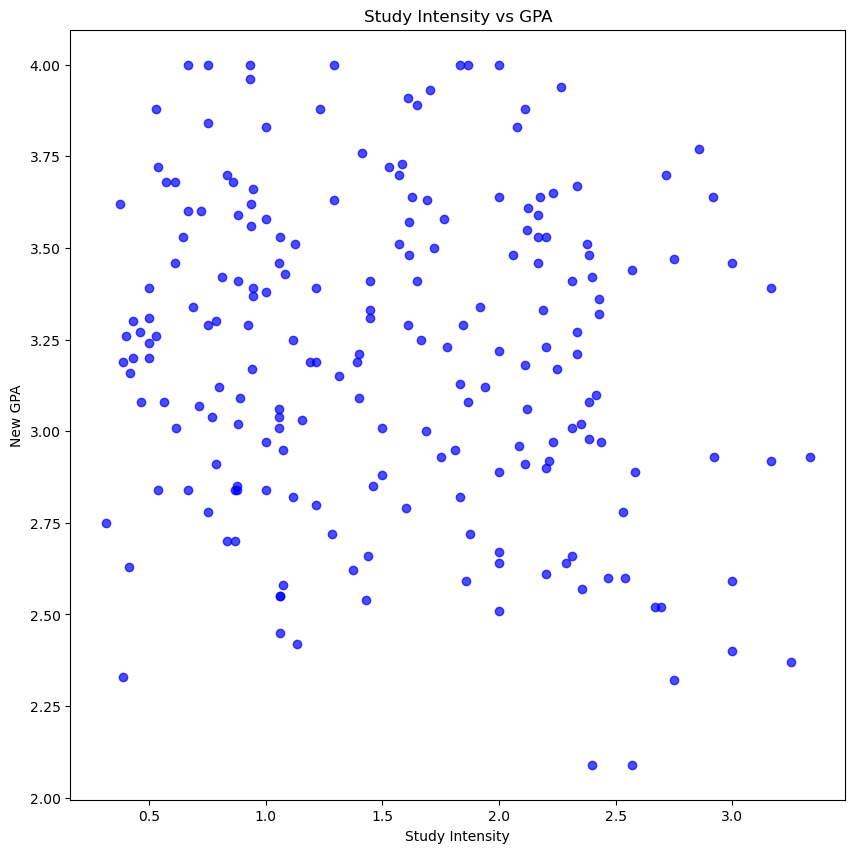

In [154]:
# You can break this cell up if you prefer.
import matplotlib.pyplot as plt

all_together = pd.merge(df,af)
#print(all_together)

#all_together.info()
top_10 = grade_cleaned.sort_values(by='GPA_change', ascending=False).head(10)
#print(top_10)

correlation = grade_cleaned['StudyIntensity'].corr(grade_cleaned['GPA_Sem2'])
#print(correlation)


plt.figure(figsize=(10, 10))
plt.scatter(grade_cleaned['StudyIntensity'], grade_cleaned['GPA_Sem2'], alpha=0.7, color='blue')
plt.title('Study Intensity vs GPA')
plt.xlabel('Study Intensity')
plt.ylabel('New GPA')
plt.show()

                 mean       std
Scholarship                    
No           3.173651  0.437790
Yes          3.271282  0.406714


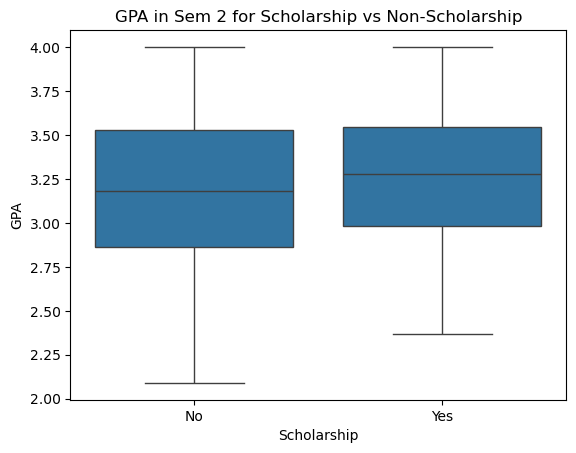

In [111]:

import seaborn as sea#looked up a different plot method so that the data could be seen more clearly vs using mathplot
gpa_stats = grade_cleaned.groupby('Scholarship')['GPA_Sem2'].agg(['mean', 'std'])
print(gpa_stats)
sea.boxplot(data=grade_cleaned, x='Scholarship', y='GPA_Sem2')

plt.title('GPA in Sem 2 for Scholarship vs Non-Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('GPA')
plt.show()

AttendanceFlag
Good Attendance    3.156632
Low Attendance     3.258349
Name: GPA_Sem2, dtype: float64


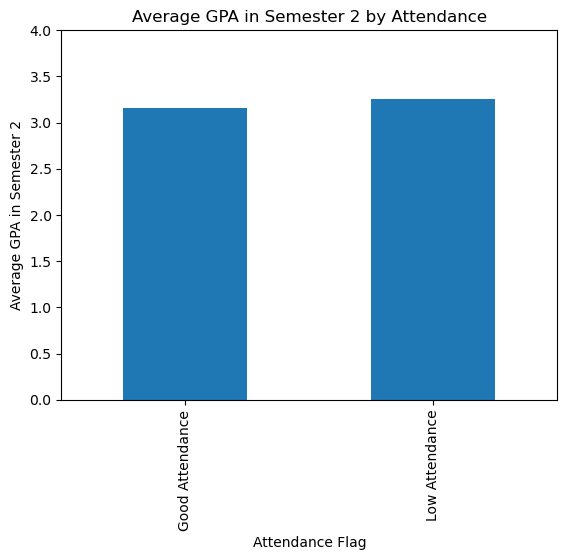

In [71]:
attendance_gpa = grade_cleaned.groupby('AttendanceFlag')['GPA_Sem2'].mean()
print(attendance_gpa)

attendance_gpa.plot(kind='bar')
plt.title('Average GPA in Semester 2 by Attendance')
plt.xlabel('Attendance Flag')
plt.ylabel('Average GPA in Semester 2')
plt.ylim(0, 4.0)  

plt.show()

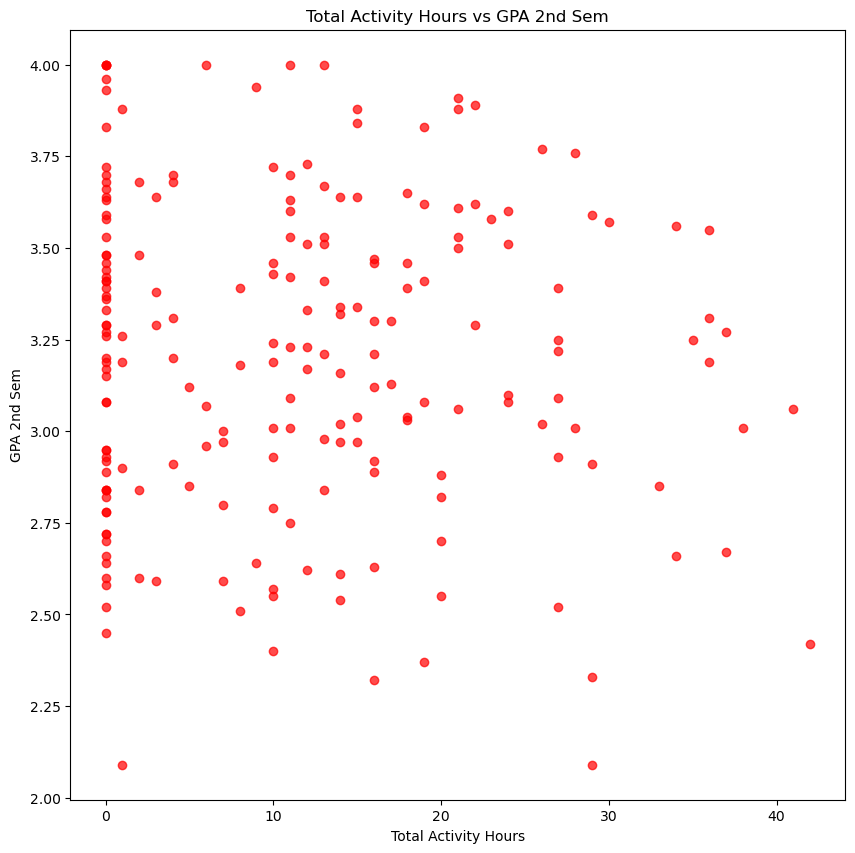

In [91]:
activity_total = all_together.groupby('StudentID')['HoursPerWeek'].sum()
grade_cleaned['Total_Hours'] = activity_total
grade_cleaned['Total_Hours'] = grade_cleaned['Total_Hours'].fillna(0)


plt.figure(figsize=(10, 10))
plt.scatter(grade_cleaned['Total_Hours'], grade_cleaned['GPA_Sem2'], alpha=0.7, color='red')
plt.title('Total Activity Hours vs GPA 2nd Sem')
plt.xlabel('Total Activity Hours')
plt.ylabel('GPA 2nd Sem')
plt.show()

GPA Summary
                    mean       std  count
LeadershipRole                           
No              3.212950  0.403818    139
Yes             3.206769  0.478419     65


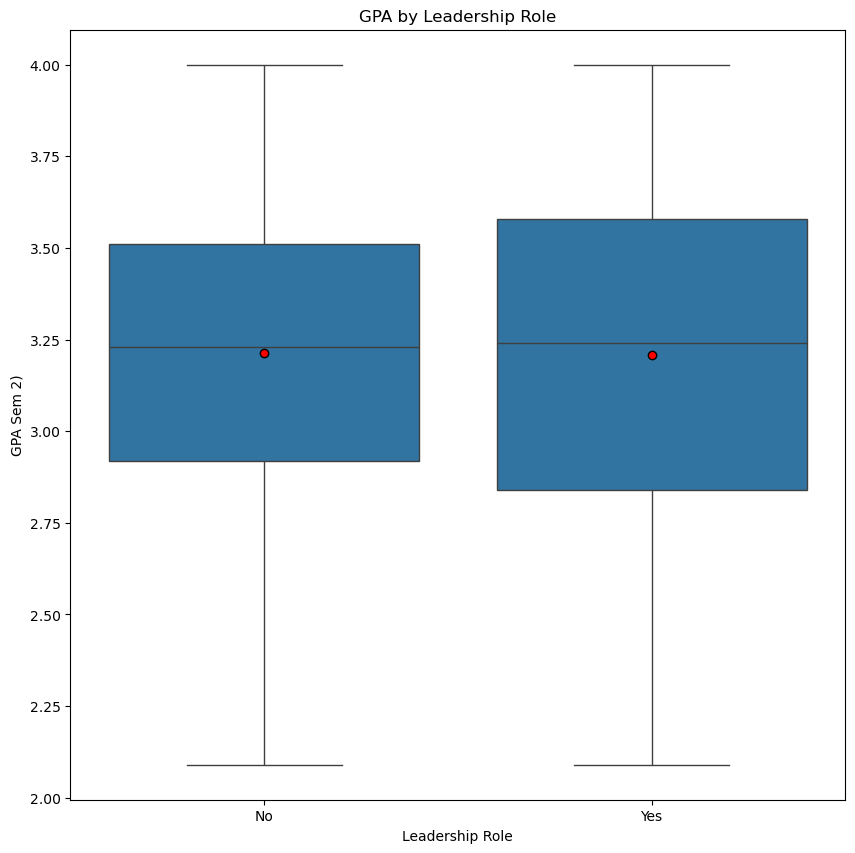

In [115]:
grade_cleaned['LeadershipRole'] = all_together['LeadershipRole']
summary = grade_cleaned.groupby('LeadershipRole')['GPA_Sem2'].agg(['mean', 'std', 'count'])
print("GPA Summary")
print(summary)

plt.figure(figsize=(10, 10))
sea.boxplot(data=grade_cleaned, x='LeadershipRole', y='GPA_Sem2', showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})
plt.title('GPA by Leadership Role')
plt.xlabel('Leadership Role')
plt.ylabel('GPA Sem 2)')
plt.show()

                   MeanGPA  MeanStudyIntensity  ScholarshipRate
Major                                                          
Biology           3.283235            1.683030        38.235294
Computer Science  3.223617            1.580561        40.425532
Economics         3.149524            1.423180        28.571429
English           3.230645            1.508406        38.709677
Psychology        3.189400            1.542775        44.000000


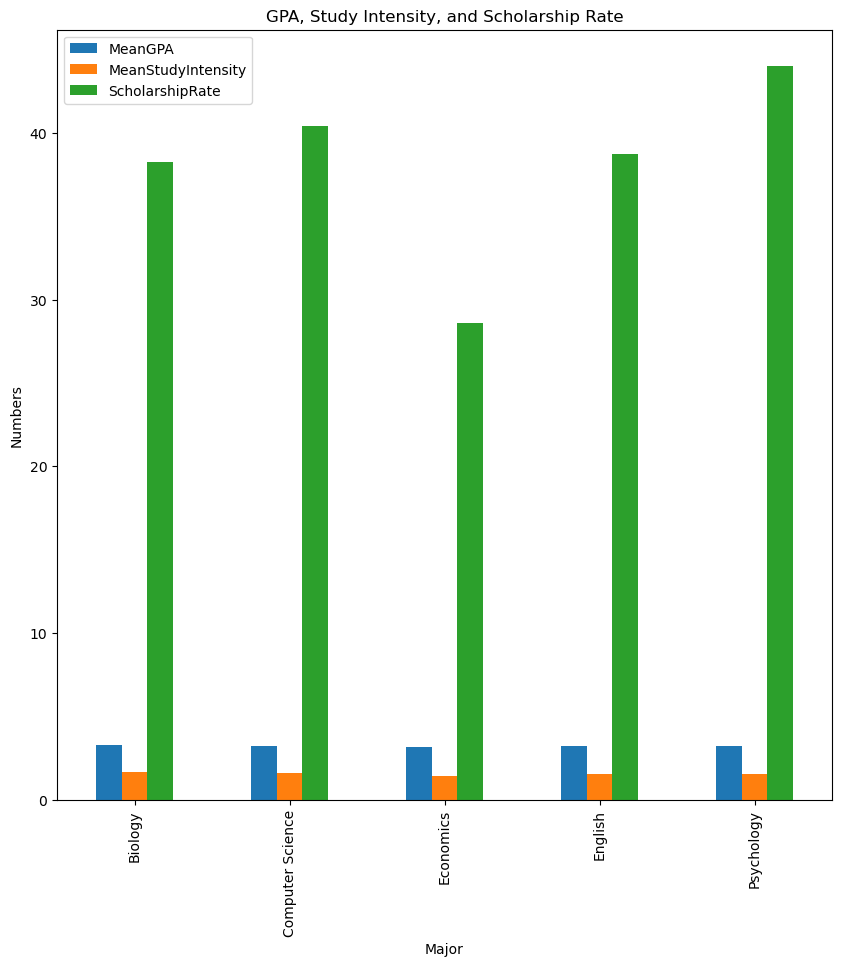

In [132]:
major_stats = grade_cleaned.groupby('Major').agg(
    MeanGPA=('GPA_Sem2', 'mean'),
    MeanStudyIntensity=('StudyIntensity', 'mean'),
    ScholarshipRate=('Scholarship', lambda x: (x == 'Yes').mean() * 100))
print(major_stats)

major_stats.plot(kind='bar', figsize=(10, 10))
plt.title('GPA, Study Intensity, and Scholarship Rate')
plt.ylabel('Numbers')
plt.show()

In [152]:
gpa = grade_cleaned['GPA_Sem2'].to_numpy()
attendance = grade_cleaned['AttendanceRate'].to_numpy()
study = grade_cleaned['StudyIntensity'].to_numpy()
z_gpa = (gpa - gpa.mean()) / gpa.std()
z_attendance = (attendance - attendance.mean()) / attendance.std()
z_study = (study - study.mean()) / study.std()

grade_cleaned['SuccessScore'] = z_gpa + z_attendance + z_study
top_15 = grade_cleaned.sort_values(by='SuccessScore', ascending=False).head(15)
print(top_15[['StudentID', 'GPA_Sem2', 'AttendanceRate', 'StudyIntensity', 'SuccessScore']])

     StudentID  GPA_Sem2  AttendanceRate  StudyIntensity  SuccessScore
143       1144      3.46            0.97        3.000000      3.793074
220       1221      3.67            0.98        2.333333      3.527020
10        1011      3.83            0.97        2.076923      3.418735
69        1070      2.93            0.99        3.333333      3.276196
33        1034      3.91            0.99        1.611111      3.256553
171       1172      3.65            0.97        2.230769      3.203844
34        1035      3.70            0.91        2.714286      3.140911
41        1042      3.51            0.97        2.375000      3.069751
126       1127      3.46            0.99        2.166667      2.949200
66        1067      3.41            0.98        2.312500      2.889766
179       1180      3.93            0.95        1.705882      2.877320
47        1048      3.70            1.00        1.571429      2.849498
4         1005      2.92            0.97        3.166667      2.751863
177   

---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

## Change me
* Bullet points  **boldface**
* The first actionable insights from my data is that there isn't any significance difference in the average GPA of students who
* hold a leadership role vs those who do not. Students in leadership positions have an average GPA of 3.21, while students without leadership roles have an average of 3.22. This small difference suggests that being in a position of leadership does not directly correlate with having a better GPA. The bar graph helps to visually confirm this finding, because the mean GPA for students with leadership roles is slightly lower than that of those without a leadership role. This data is important because it debunks the assumption that leadership experience inherently reflects stronger academic accomplishments. The second insight is that students with a study intensity between 0.5 and 2.0 tend to have higher GPAs on average. The scatterplot supports this, showing a higher number of data points in the 3.0–4.0 GPA range when study intensity falls within this range.It also shows that increasing study intensity beyond this point does not seem to improve GPA and may even correlate with having a lower GPA. This suggests that quality of studying may be more important than the amount of hours spent studying. Overall, the most actionable data variables in predicting academic success seem to be study intensity not the students leadership status.
